In [1]:
import sys
main_dir = '../'
sys.path.append(main_dir)

from functools import lru_cache
from matplotlib.offsetbox import AnchoredText

import numpy as np
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
import tqdm
import time

import scipy.ndimage as sn

import matplotlib.pyplot as plt

import opennu as on
import gammas as ga

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [16]:
vnu = 5.3e-4/0.05/8065
vnu/1

1.314321140731556e-06

In [9]:
%%time

R = 10    # cm
m = 0.16  # eV



de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1.0, T2=10, Nshots=10, seed=42, d_init=1e8, d_fin=1e16, ndelta=100,
                 chi2_crit=2.7, squid_noise_ratio=0.0, ncode=1e10)
print("\ndelta: %.3e\n"%de)


delta: 2.057e+11

CPU times: user 2.37 s, sys: 3.99 ms, total: 2.38 s
Wall time: 2.37 s


In [10]:
9e13/2e11

450.0

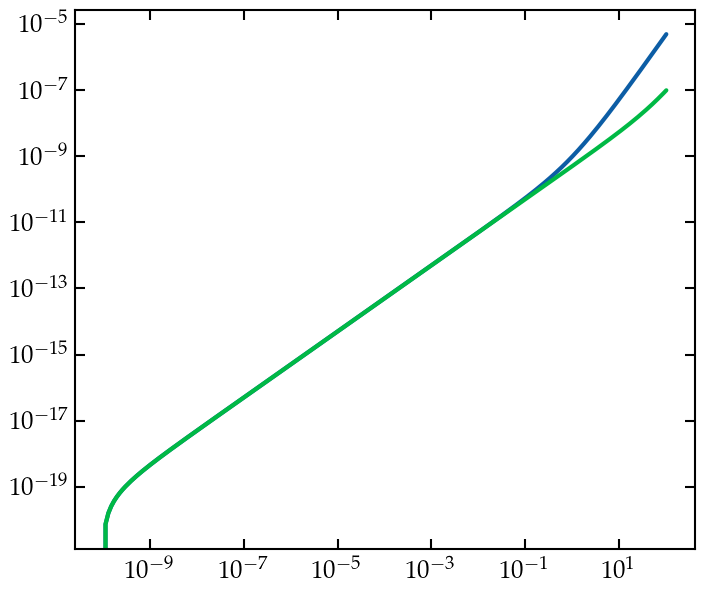

In [98]:
Ncode = 1e8

ti = 1e-10
tf = 1e2

t, j0, _, _, _ = on.solve2nd(Ncode, state='P', p_init=1.0,  tf=tf, ti=ti, gd_ratio=0)
t, j1, _, _, _ = on.solve2nd(Ncode, state='P', p_init=0.1, tf=tf, ti=ti, gd_ratio=0)

plt.loglog(t, np.abs(j0)/Ncode*2)
plt.loglog(t, np.abs(j1)/Ncode*2)

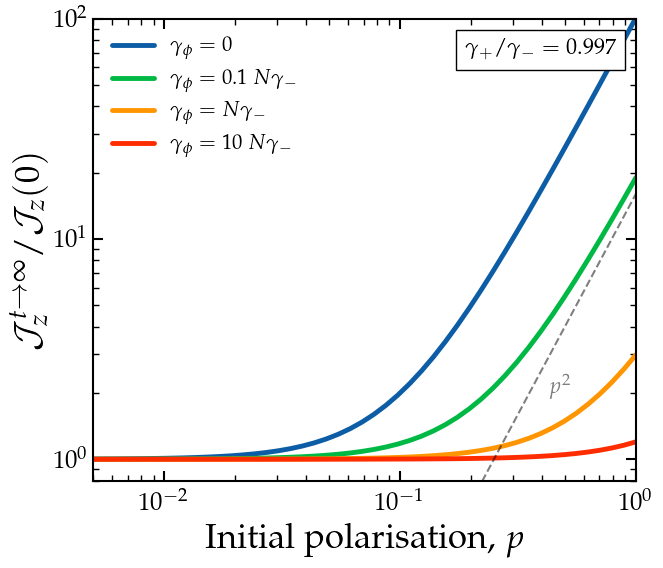

In [95]:
Ncode = 1e8

ti = 1e-5
tf = 1e5

fig, ax = plt.subplots(figsize=(7,6))

pols = np.geomspace(1e-5, 1, 100)
jj0 = []
jj1 = []
jj2 = []
jj3 = []
for p in pols:

    t, j0, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=0)
    t, j1, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=0.1*Ncode)
    t, j2, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=Ncode)
    t, j3, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=10*Ncode)
    jj0.append(np.abs(j0[-1]))
    jj1.append(np.abs(j1[-1]))
    jj2.append(np.abs(j2[-1]))
    jj3.append(np.abs(j3[-1]))

jj0 = np.array(jj0)
jj1 = np.array(jj1)
jj2 = np.array(jj2)
jj3 = np.array(jj3)

plt.loglog(pols, jj0/jj0[0], lw=3.5, label=r'$\gamma_{\phi}=0$')
plt.loglog(pols, jj1/jj1[0], lw=3.5, label=r'$\gamma_{\phi}=0.1~N\gamma_-$')
plt.loglog(pols, jj2/jj2[0], lw=3.5, label=r'$\gamma_{\phi}=N\gamma_-$')
plt.loglog(pols, jj3/jj3[0], lw=3.5, label=r'$\gamma_{\phi}=10~N\gamma_-$')

plt.loglog(pols*25, 1e4*pols**2, c='k', ls='--', lw=1.5, alpha=0.5)
plt.text(0.43, 2, r'$p^2$', fontsize=16, alpha=0.5, c='k')


gamma = 0.997
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.3f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=16)
)
ax.add_artist(text_box)


plt.xlabel(r'Initial polarisation, $p$', fontsize=25)
plt.ylabel(r'${\cal J}_z^{{t \to\infty}}/{\cal J}_z(0)$', fontsize=25)
plt.legend()
plt.xlim(5e-3, 1)
plt.ylim(0.8, 1e2)
plt.show()
fig.savefig(main_dir+'plots/sigmax_t.pdf', bbox_inches='tight')

In [24]:
%%time
de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=1000, Nshots=10, seed=42, d_init=3e8, d_fin=1e9, ndelta=25,
                 chi2_crit=3.84, squid_noise_ratio=0.0)
print("\ndelta: %.3e\n"%de)


delta: 5.209e+08

CPU times: user 1min 42s, sys: 13.7 s, total: 1min 56s
Wall time: 1min 9s


In [4]:
print("\ndelta: %.3e\n"%(de/10))


delta: 5.298e+07



In [9]:
%%time
de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=1000, Nshots=10, seed=42, d_init=1e8, d_fin=2e8, ndelta=30,
                 chi2_crit=2.7, squid_noise_ratio=0.0)
print("\ndelta: %.3e\n"%de)


delta: 1.33e+08

CPU times: user 1min 50s, sys: 14.7 s, total: 2min 5s
Wall time: 1min 15s


In [10]:
%%time
de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=1000, Nshots=10, seed=42, d_init=1e8, d_fin=2e8, ndelta=30,
                 chi2_crit=3.84, squid_noise_ratio=0.0)
print("\ndelta: %.3e\n"%de)


delta: 1.43e+08

CPU times: user 2min 15s, sys: 18.6 s, total: 2min 34s
Wall time: 1min 32s


In [4]:
# %%time
# de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=1000, Nshots=10, seed=42, d_init=1e9, d_fin=1e15, ndelta=100,
#                  chi2_crit=2.7, squid_noise_ratio=0.0)
# print("\ndelta: %.2e\n"%de)

In [3]:
%%time
de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=1000, Nshots=10, seed=42, d_init=1e7, d_fin=2e8, ndelta=20,
                 chi2_crit=2.7, squid_noise_ratio=0.0)
print("\ndelta: %.2e\n"%de)


delta: 1.25e+08

CPU times: user 2min 23s, sys: 20.9 s, total: 2min 44s
Wall time: 1min 39s


In [5]:
print("%.1e"%(1.25e7*10**(1/2)*10000*100**(1.3)))

1.6e+14


### $M_{\nu}=\sum m_{\nu}$ dependence

In [15]:
mnl = np.linspace(0.06, 1, 30)
dell_m = []
dell_m2 = []
for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(10, m, T2=1, Nshots=10, seed=42, d_init=1e14, d_fin=2e16, ndelta=200)
    de2, c2, _ = on.get_delta_jz(10, m, T2=1, Nshots=10, seed=23, d_init=1e14, d_fin=2e16, ndelta=200)
    dell_m.append(de)
    dell_m2.append(de2)

dell_m = np.array(dell_m)
dell_m2 = np.array(dell_m2)

100%|███████████████████████████████████████████| 30/30 [00:42<00:00,  1.41s/it]


In [21]:
# plt.loglog(mnl, dell_m/dell_m[0], label=r'$T_2=$1 s, seed: 42')
# plt.loglog(mnl, dell_m2/dell_m2[0], label=r'$T_2=$5 s, seed: 23')

# plt.xlabel(r'$\sum m_{\nu}$')
# plt.ylabel(r'$\delta_{\nu}$ [a.u.]')
# plt.show()

In [29]:
mnl = np.linspace(0.06, 1, 30)
dell_m = []
dell_m2 = []
for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(10, m, T2=10, Nshots=10, seed=42, d_init=5e8, d_fin=5e11, ndelta=100)
    de2, c2, _ = on.get_delta_jz(10, m, T2=10, Nshots=10, seed=23,d_init=5e8, d_fin=5e11, ndelta=100)
    dell_m.append(de)
    dell_m2.append(de2)

dell_m = np.array(dell_m)
dell_m2 = np.array(dell_m2)

100%|███████████████████████████████████████████| 30/30 [02:46<00:00,  5.56s/it]


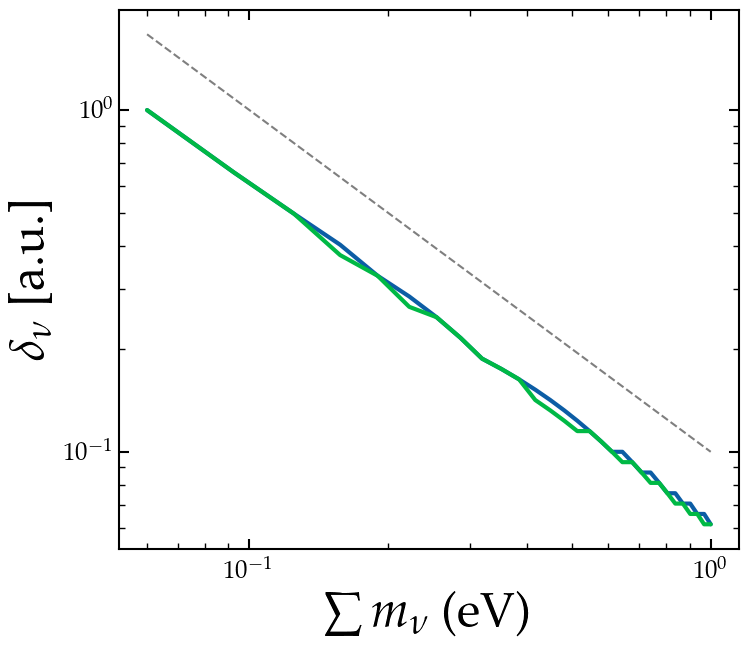

In [35]:
plt.loglog(mnl, dell_m/dell_m[0], label=r'$T_2=$1 s, seed: 42')
plt.loglog(mnl, dell_m2/dell_m2[0], label=r'$T_2=$5 s, seed: 23')

plt.loglog(mnl, 0.1*mnl**(-1), c='k', ls='--', alpha=0.5, lw=1.5)

plt.xlabel(r'$\sum m_{\nu}$ (eV)')
plt.ylabel(r'$\delta_{\nu}$ [a.u.]')
plt.show()

In [6]:
dell

[np.float64(2.96730240818886e+17),
 np.float64(2.96730240818886e+17),
 np.float64(2.96730240818886e+17),
 np.float64(3.2929712550971616e+17)]

### $N_{\rm shots}$ dependence

In [29]:
nsl = np.geomspace(5, 1000, 100)
dell, dell2, dell3, dell4 = [], [], [], []
see = 25
for ns in tqdm.tqdm(nsl):
    de, c2, _  = on.get_delta_jz(1, 0.16, T2=0.01, Nshots=int(ns), seed=see, d_init=1e16, d_fin=1e18, ndelta=200)
    dell.append(de)
    de, c2, _  = on.get_delta_jz(1, 0.16, T2=0.01, Nshots=int(ns), seed=see, d_init=1e16, d_fin=1e18, ndelta=200, squid_noise_ratio=0.01)
    dell2.append(de)
    de, c2, _  = on.get_delta_jz(1, 0.16, T2=0.01, Nshots=int(ns), seed=see, d_init=1e16, d_fin=1e18, ndelta=200, squid_noise_ratio=0.1)
    dell3.append(de)
    de, c2, _  = on.get_delta_jz(1, 0.16, T2=0.01, Nshots=int(ns), seed=see, d_init=1e16, d_fin=1e18, ndelta=200, squid_noise_ratio=1)
    dell4.append(de)

dell = np.array(dell)
dell2 = np.array(dell2)
dell3 = np.array(dell3)
dell4 = np.array(dell4)

100%|█████████████████████████████████████████| 100/100 [03:40<00:00,  2.21s/it]


In [25]:
# nsl = np.geomspace(1, 1000, 100)
# dell2 = []
# for ns in tqdm.tqdm(nsl):
#     de, c2, _  = on.get_delta_jz(10, 0.16, T2=0.1, Nshots=int(ns), seed=42, d_init=1e12, d_fin=1e15, ndelta=200, squid_noise_ratio=5.0)
#     dell2.append(de)

# dell2 = np.array(dell2)

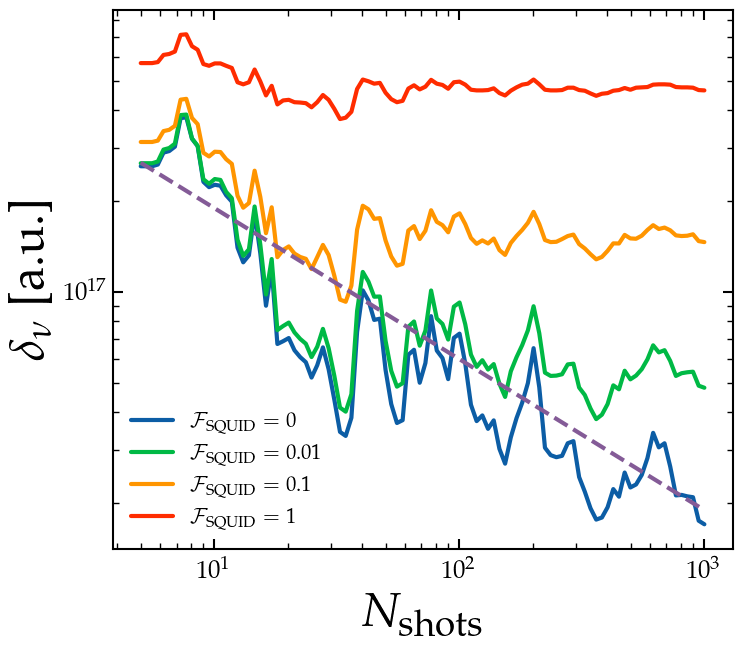

In [30]:
s = 0.5

plt.loglog(nsl, sn.gaussian_filter(dell, sigma=s), label=r'${\cal F}_{\rm SQUID}=0$')
plt.loglog(nsl, sn.gaussian_filter(dell2, sigma=s), label=r'${\cal F}_{\rm SQUID}=0.01$')
plt.loglog(nsl, sn.gaussian_filter(dell3, sigma=s), label=r'${\cal F}_{\rm SQUID}=0.1$')
plt.loglog(nsl, sn.gaussian_filter(dell4, sigma=s), label=r'${\cal F}_{\rm SQUID}=1$')
plt.loglog(nsl, 6e17*nsl**(-0.5), ls='--')

plt.legend()
plt.xlabel(r'$N_{\rm shots}$')
plt.ylabel(r'$\delta_{\nu}$ [a.u.]')
plt.show()

In [33]:
de, c2, _  = on.get_delta_jz(10, 0.16, T2=0.1, Nshots=10, seed=42, d_init=1e12, d_fin=1e15, ndelta=200, squid_noise_ratio=1.0)
print("%.3e"%de)

1.956e+14


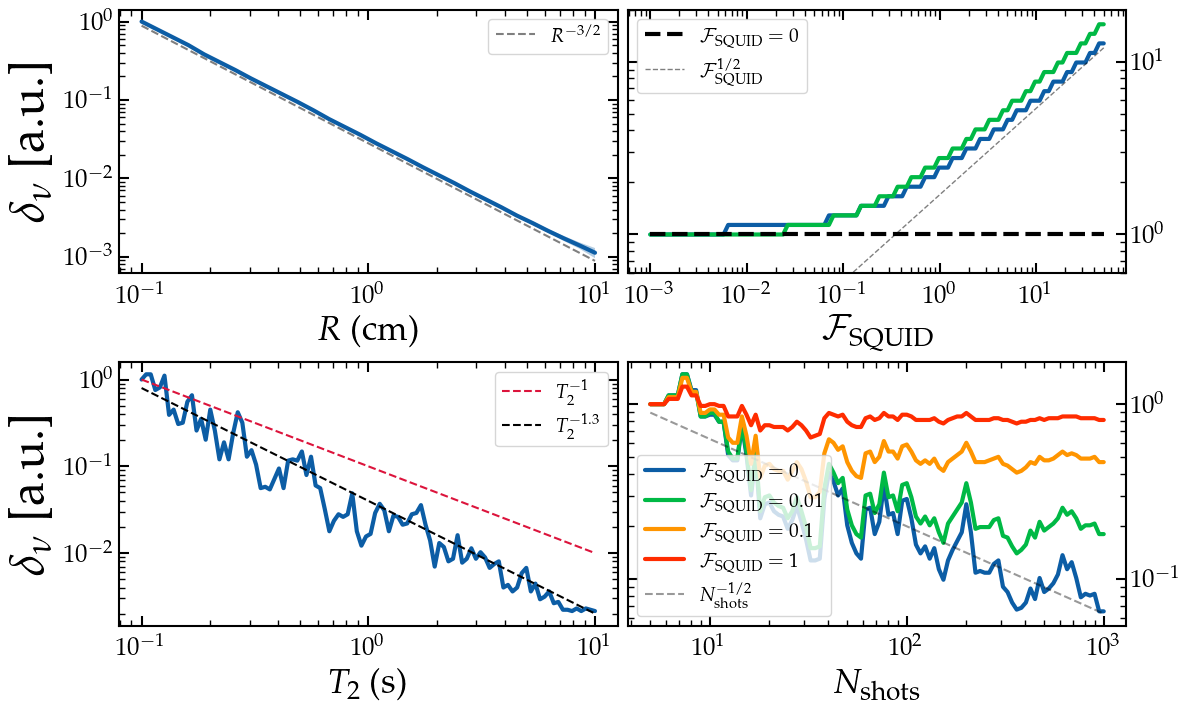

In [175]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
fig.subplots_adjust(wspace=0.02, hspace=0.34)
fs = 14

#-----------------------------------------------------------------------------------------------------------
ax[0,0].loglog(rl, me)
ax[0,0].fill_between(rl, me-er, me+er, alpha=0.3)
ax[0,0].loglog(rl, 0.028*rl**(-1.5), ls='--', label=r'$R^{-3/2}$', c='k', alpha=0.5, lw=1.5)

ax[0,0].set_xlabel(r'$R$ (cm)', fontsize=25)
ax[0,0].set_ylabel(r'$\delta_{\nu}$ [a.u.]')
ax[0,0].legend(fontsize=fs, frameon=True)




#-----------------------------------------------------------------------------------------------------------
ax[0,1].loglog(sql, dell_sq/dell_sq[0])
ax[0,1].loglog(sql, dell_sq2/dell_sq2[0])
ax[0,1].loglog(sql, sql/sql, c='k', ls='--', label=r'${\cal F}_{\rm SQUID}=0$')
ax[0,1].loglog(sql, 1.7*sql**(1/2), ls='--', lw=1, alpha=0.5,c='k', label=r'${\cal F}_{\rm SQUID}^{1/2}$')

ax[0,1].set_ylim(0.6, 20)
ax[0,1].legend(fontsize=fs, frameon=True)
ax[0,1].set_xlabel(r'${\cal F}_{\rm SQUID}$', fontsize=25)
ax[0,1].tick_params(labelleft=False, labelright=True)


#-----------------------------------------------------------------------------------------------------------
ax[1,0].loglog(t2l, dell_t2/dell_t2[0])
ax[1,0].loglog(t2l, 0.1*t2l**(-1), ls='--', label=r'$T_2^{-1}$', c='crimson', lw=1.5)
ax[1,0].loglog(t2l, 0.04*t2l**(-1.3), ls='--', label=r'$T_2^{-1.3}$', c='k', lw=1.5)
ax[1,0].legend(fontsize=fs, frameon=True)
ax[1,0].set_xlabel(r'$T_2$ (s)', fontsize=25)
ax[1,0].set_ylabel(r'$\delta_\nu$ [a.u.]')

#-----------------------------------------------------------------------------------------------------------
s = 0.1
ax[1,1].loglog(nsl, sn.gaussian_filter(dell, sigma=s)/dell[0], label=r'${\cal F}_{\rm SQUID}=0$')
ax[1,1].loglog(nsl, sn.gaussian_filter(dell2, sigma=s)/dell2[0], label=r'${\cal F}_{\rm SQUID}=0.01$')
ax[1,1].loglog(nsl, sn.gaussian_filter(dell3, sigma=s)/dell3[0], label=r'${\cal F}_{\rm SQUID}=0.1$')
ax[1,1].loglog(nsl, sn.gaussian_filter(dell4, sigma=s)/dell4[0], label=r'${\cal F}_{\rm SQUID}=1$')
ax[1,1].loglog(nsl, 2*nsl**(-0.5), ls='--', c='k', lw=1.5, alpha=0.4, label=r'$N_{\rm shots}^{-1/2}$')
ax[1,1].set_xlabel(r'$N_{\rm shots}$', fontsize=25)
ax[1,1].legend(fontsize=fs, frameon=True)
ax[1,1].tick_params(labelleft=False, labelright=True)

# plt.tight_layout()
plt.show()
#fig.savefig(main_dir+'plots/delta_scaling.pdf', bbox_inches='tight')

### $T_2$ dependence

In [55]:
t2l = np.geomspace(0.1, 10, 100)
dell_t2 = []
for tt in tqdm.tqdm(t2l):
    de, c2,_  = on.get_delta_jz(10, 0.16, T2=tt, Nshots=100, seed=42, d_init=1e11, d_fin=1e14, ndelta=200)
    dell_t2.append(de)

dell_t2 = np.array(dell_t2)

100%|█████████████████████████████████████████| 100/100 [01:30<00:00,  1.11it/s]


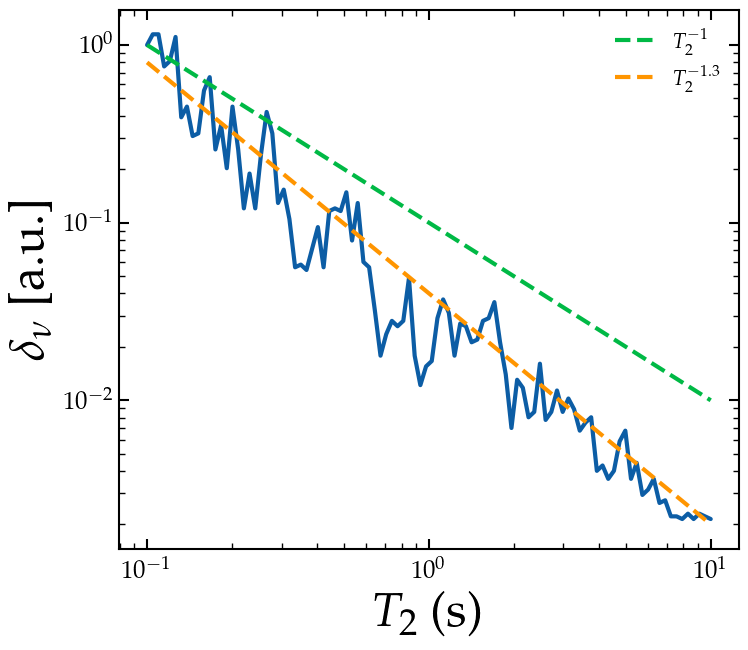

In [56]:
plt.loglog(t2l, dell_t2/dell_t2[0])
plt.loglog(t2l, 0.1*t2l**(-1), ls='--', label=r'$T_2^{-1}$')
plt.loglog(t2l, 0.04*t2l**(-1.3), ls='--', label=r'$T_2^{-1.3}$')

plt.xlabel(r'$T_2$ (s)')
plt.ylabel(r'$\delta_{\nu}$ [a.u.]')
plt.legend()
plt.show()

In [84]:
dell_r

[np.float64(1431458937523481.5)]

### $R$ dependence

In [91]:
rl = np.geomspace(0.1, 10, 30)
dell_r = []
dell_r2 = []
for r in tqdm.tqdm(rl):
    de, c2, _  = on.get_delta_jz(r, 0.16, T2=1, Nshots=10, seed=51, d_init=1e12, d_fin=1e17, ndelta=200)
    de2, c2, _  = on.get_delta_jz(r, 0.16, T2=1, Nshots=10, seed=12, d_init=1e12, d_fin=1e17, ndelta=200)
    dell_r.append(de)
    dell_r2.append(de2)

dell_r = np.array(dell_r)
dell_r2 = np.array(dell_r2)

100%|███████████████████████████████████████████| 30/30 [00:57<00:00,  1.91s/it]


In [92]:
dell_r03 = dell_r
dell_r04 = dell_r2

In [110]:
np.mean(np.array([dell_r01/dell_r01[0], dell_r02/dell_r02[0], dell_r03/dell_r03[0], dell_r04/dell_r04[0]]), axis=0)

array([1.        , 0.79340967, 0.6294989 , 0.49945051, 0.38173878,
       0.30287524, 0.24030414, 0.1878783 , 0.14906446, 0.11826918,
       0.09383591, 0.07360363, 0.05690076, 0.04514561, 0.03581896,
       0.02800691, 0.02222096, 0.01763032, 0.01382807, 0.01097133,
       0.00870476, 0.00680939, 0.00540264, 0.00428651, 0.00335249,
       0.00269306, 0.0021367 , 0.00171715, 0.00139639, 0.00112444])

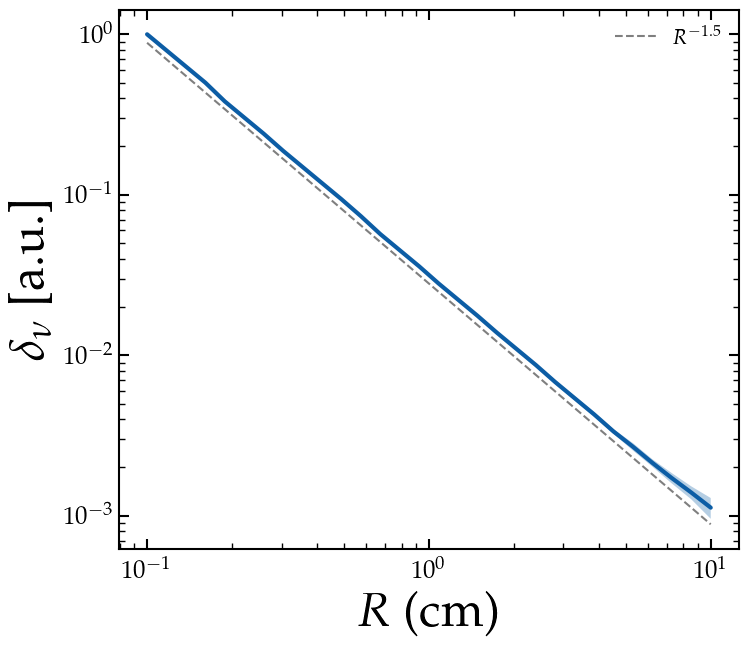

In [129]:
#plt.loglog(rl, dell_r01/dell_r01[0], label='seed: 42')
#plt.loglog(rl, dell_r02/dell_r02[0], label='seed: 23')
#plt.loglog(rl, dell_r03/dell_r03[0], label='seed: 42')
#plt.loglog(rl, dell_r04/dell_r04[0], label='seed: 23')
me = np.mean(np.array([dell_r01/dell_r01[0], dell_r02/dell_r02[0], dell_r03/dell_r03[0], dell_r04/dell_r04[0]]), axis=0)
er = np.std(np.array([dell_r01/dell_r01[0], dell_r02/dell_r02[0], dell_r03/dell_r03[0], dell_r04/dell_r04[0]]), axis=0)
plt.loglog(rl, me)
plt.fill_between(rl, me-er, me+er, alpha=0.3)

#plt.loglog(rl, 0.003*rl**(-3), ls='--', label=r'$R^{-3}$')
plt.loglog(rl, 0.028*rl**(-1.5), ls='--', label=r'$R^{-1.5}$', c='k', alpha=0.5, lw=1.5)

plt.xlabel(r'$R$ (cm)')
plt.ylabel(r'$\delta_{\nu}$ [a.u.]')
plt.legend()
plt.show()

### $p$ dependence

In [45]:
pl = np.geomspace(0.001, 1, 20)
dell_p = []
dell_p2 = []
for p in tqdm.tqdm(pl):
    de, c2, _  = on.get_delta_jz(10, 0.16,  p_init=p, T2=1, Nshots=100, seed=42, d_init=1e11, d_fin=1e22, ndelta=200)
    de2, c2, _  = on.get_delta_jz(10, 0.16, p_init=p, T2=1, Nshots=100, seed=23, d_init=1e11, d_fin=1e22, ndelta=200)
    dell_p.append(de)
    dell_p2.append(de2)

dell_p = np.array(dell_p)
dell_p2 = np.array(dell_p2)

100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.19s/it]


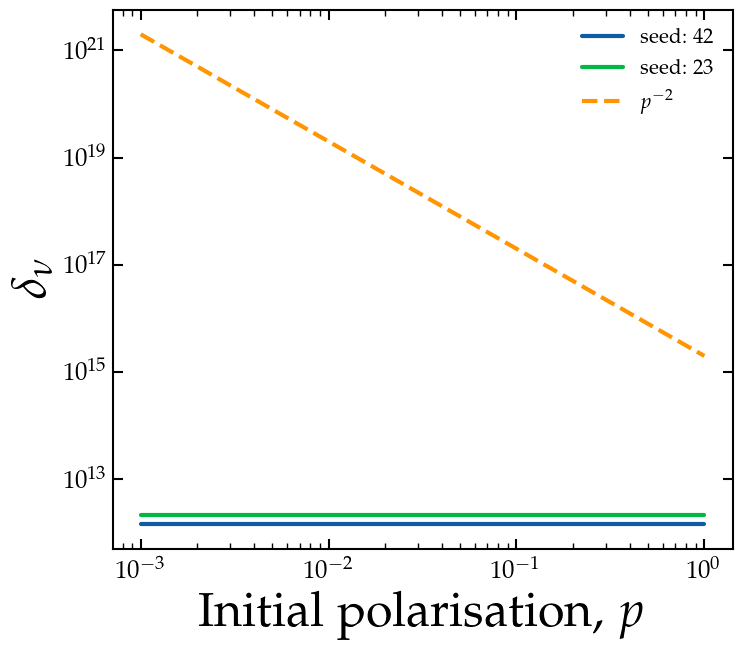

In [46]:
plt.loglog(pl, dell_p, label='seed: 42')
plt.loglog(pl, dell_p2, label='seed: 23')

plt.loglog(pl, 2e15*pl**(-2), ls='--', label=r'$p^{-2}$')

plt.xlabel(r'Initial polarisation, $p$')
plt.ylabel(r'$\delta_{\nu}$')
plt.legend()
plt.show()

### SQUID noise dependence

In [147]:
sql = np.geomspace(0.001, 50, 100)
dell_sq = []
dell_sq2 = []
for sq in tqdm.tqdm(sql):
    de, c2, _  = on.get_delta_jz(10, 0.16,  T2=0.1, Nshots=10, seed=42, d_init=1e11, d_fin=1e22, ndelta=200, squid_noise_ratio=sq)
    de2, c2, _  = on.get_delta_jz(10, 0.16, T2=0.1, Nshots=10, seed=23, d_init=1e11, d_fin=1e22, ndelta=200, squid_noise_ratio=sq)
    dell_sq.append(de)
    dell_sq2.append(de2)

dell_sq = np.array(dell_sq)
dell_sq2 = np.array(dell_sq2)

100%|█████████████████████████████████████████| 100/100 [01:51<00:00,  1.11s/it]


In [151]:
de0, c2, _  = on.get_delta_jz(10, 0.16,  T2=0.1, Nshots=10, seed=42, d_init=1e11, d_fin=1e22, ndelta=200, squid_noise_ratio=0)
print("%.3e"%de0)

3.449e+14


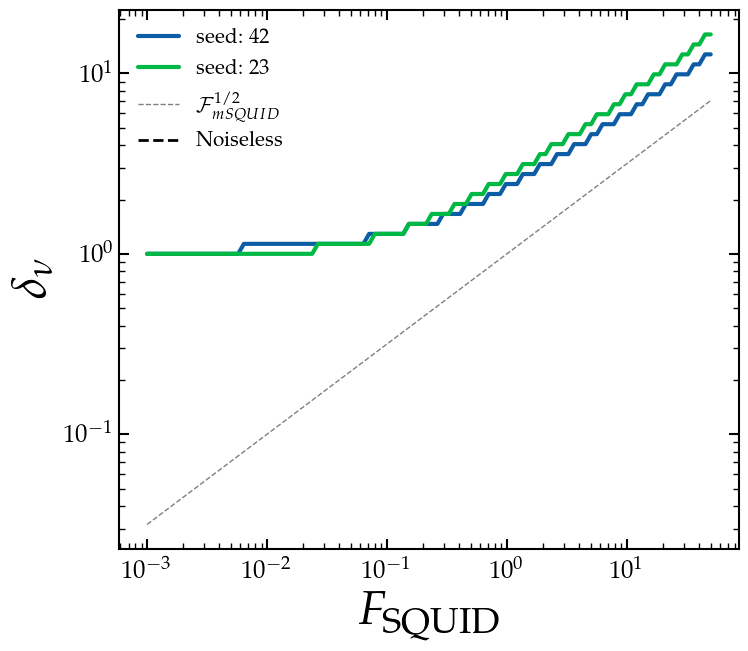

In [155]:
plt.loglog(sql, dell_sq/dell_sq[0], label='seed: 42')
plt.loglog(sql, dell_sq2/dell_sq2[0], label='seed: 23')
plt.loglog(sql, sql**(1/2), ls='--', lw=1, alpha=0.5,c='k', label='${\cal F}_{\rm SQUID}^{1/2}$')

#de0, c2 = on.get_delta_jz(10, 0.16,  T2=1, Nshots=100, seed=42, d_init=1e11, d_fin=1e22, ndelta=200, squid_noise_ratio=0)

plt.hlines(de0, xmin=1e-3, xmax=50, ls='--', color='k', label='Noiseless', lw=2)
# plt.ylim(1e15,1e17)
plt.xlabel(r'$F_{\rm SQUID}$')
plt.ylabel(r'$\delta_{\nu}$')
plt.legend()
plt.show()

### $n_s$ dependence

In [5]:
nsl = np.geomspace(1e21,1e23,50)
dell_ns = []
dell_ns2 = []
for nns in tqdm.tqdm(nsl):
    de, c2  = on.get_delta_jz(10, 0.16,  T2=1, Nshots=100, seed=42, d_init=1e11, d_fin=1e22, ndelta=200, ns=nns)
    de2, c2  = on.get_delta_jz(10, 0.16, T2=1, Nshots=100, seed=23, d_init=1e11, d_fin=1e22, ndelta=200, ns=nns)
    dell_ns.append(de)
    dell_ns2.append(de2)

dell_ns = np.array(dell_ns)
dell_ns2 = np.array(dell_ns2)

100%|████████████████████████████████████████████████████████████| 50/50 [01:27<00:00,  1.76s/it]


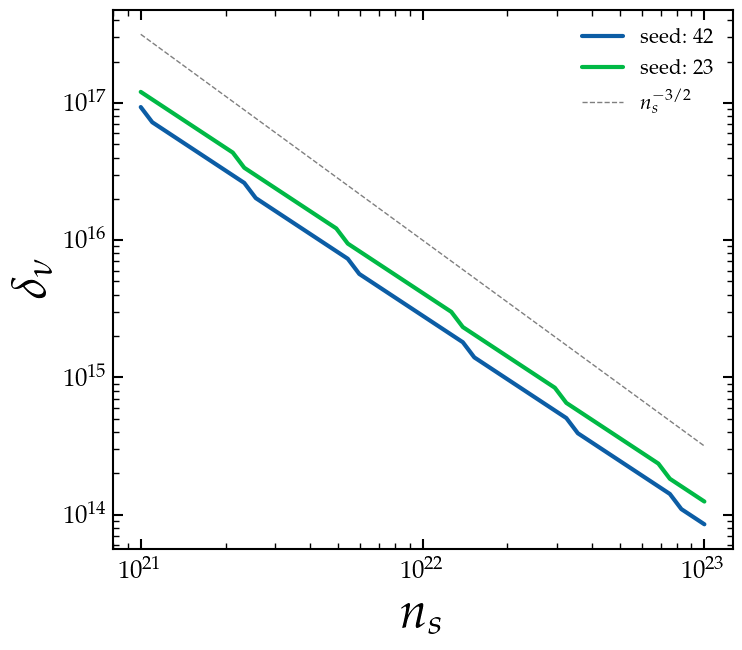

In [21]:
plt.loglog(nsl, dell_ns, label='seed: 42')
plt.loglog(nsl, dell_ns2, label='seed: 23')
plt.loglog(nsl, 1e49*nsl**(-3/2), ls='--', lw=1, alpha=0.5,c='k', label='$n_s^{-3/2}$')


plt.xlabel(r'$n_s$')
plt.ylabel(r'$\delta_{\nu}$')
plt.legend()
plt.show()

### $f_s$ dependence

In [25]:
dell_fs = []
fsl = np.geomspace(1e5, 1e7, 50)

for fs in tqdm.tqdm(fsl):
    de, c2, c2l = on.get_delta_jz(10, 0.16, p_init=1, T2=0.01, Nshots=10, seed=42, d_init=1e8, d_fin=1e16, ndelta=100,
                     chi2_crit=2.7, squid_noise_ratio=0.0, sampf=fs)
    dell_fs.append(de)
    #print("delta: %.3e"%de)

dell_fs = np.array(dell_fs)

100%|█████████████████████████████████████████████████████████████████████████| 50/50 [00:50<00:00,  1.01s/it]


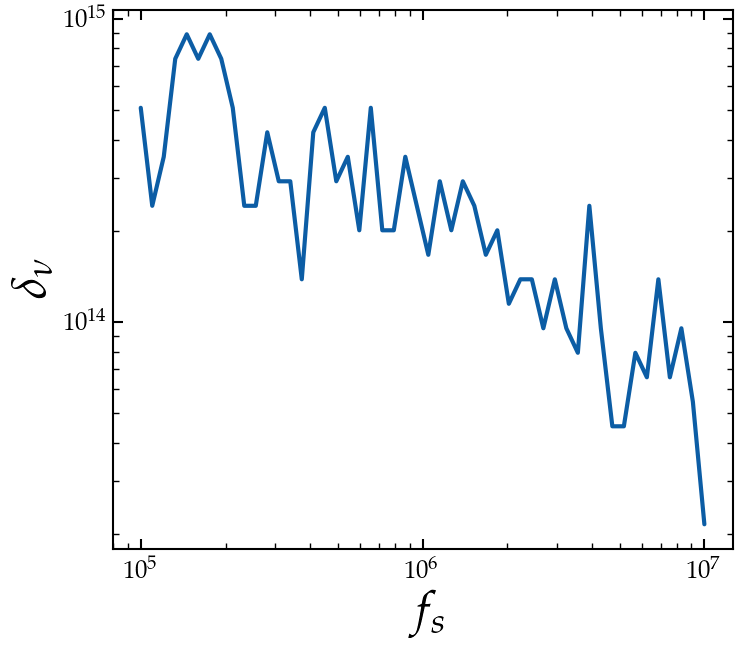

In [26]:
plt.loglog(fsl, dell_fs, label='')
#plt.loglog(nsl, 1e49*nsl**(-3/2), ls='--', lw=1, alpha=0.5,c='k', label='$n_s^{-3/2}$')


plt.xlabel(r'$f_s$')
plt.ylabel(r'$\delta_{\nu}$')
#plt.legend()
plt.show()

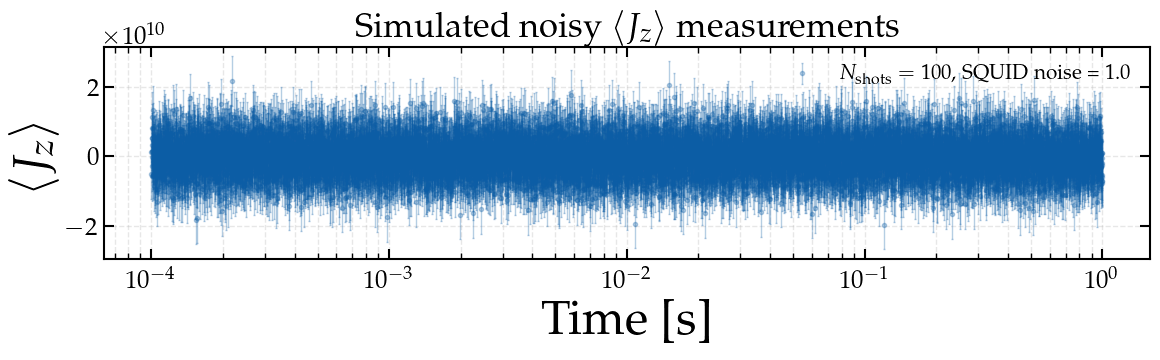

In [78]:
N = int(1e22)
Nshots = 100
sampf = 1e4
tf = 1
ti = 1 / sampf
squid_noise_ratio = 1.0  # Adjust as needed
sk = 1  # skip factor for plotting

# Time grid
n_times = int((tf - ti) * sampf)
t_exp = np.geomspace(ti, tf, n_times)

# Simulate noisy measurements of J_z (mean zero)
np.random.seed(42)
jz_true_mean = 0.0
jz_true_std = np.sqrt(N / 4)
Jz_samples = np.random.normal(jz_true_mean, jz_true_std, size=(n_times, Nshots))
Jz_mean_exp = np.mean(Jz_samples, axis=1)

# Total error: quantum + SQUID noise
sigma_jz = np.sqrt(N / 4 / Nshots * (1 + squid_noise_ratio)) * np.ones(n_times)

# Plot
plt.figure(figsize=(12, 4))
plt.errorbar(t_exp[::sk], Jz_mean_exp[::sk], yerr=sigma_jz[::sk],
             fmt='o', label=fr'$N_{{\rm shots}}={Nshots}$, SQUID noise = {squid_noise_ratio}',
             alpha=0.3, markersize=3, lw=1, capsize=1)

plt.xscale('log')
plt.xlabel("Time [s]")
plt.ylabel(r"$\langle J_z \rangle$")
plt.title("Simulated noisy $\langle J_z \\rangle$ measurements")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()

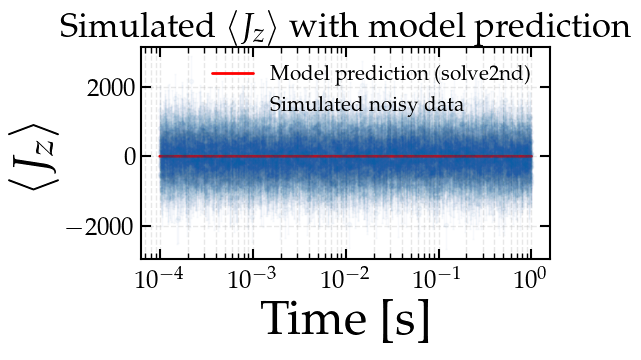

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Example parameters (adjust to your actual values)
N = int(1e8)
Nshots = 100
sampf = 1e4
tf = 1
ti = 1 / sampf
squid_noise_ratio = 1.0
sk = 1  # skip factor for plotting


delta = 1e15

# Constants and problem parameters (update as needed)
R = 10.0          # example radius in cm
mnu = 0.15        # example neutrino mass in eV
B = 0.1           # magnetic field in Tesla
T2 = 1.0          # coherence time in seconds
p_init = 1.0
tf_ratio = 0.2
seed = 42

# Time grid
n_times = int((tf - ti) * sampf)
t_exp = np.geomspace(ti, tf, n_times)

# Simulate noisy Jz measurements
np.random.seed(seed)
jz_true_mean = 0.0
jz_true_std = np.sqrt(N / 4)
Jz_samples = np.random.normal(jz_true_mean, jz_true_std, size=(n_times, Nshots))
Jz_mean_exp = np.mean(Jz_samples, axis=1)
sigma_jz = np.sqrt(N / 4 / Nshots * (1 + squid_noise_ratio)) * np.ones(n_times)

# Compute model prediction for Jz from solve2nd
# Assuming ga.compute_ratio and solve2nd are imported and available
gratio, gm = ga.compute_ratio(mnu, 2 * np.pi * 11.78e6 * B / (1 / 6.58e-16))

fsup = 4 * (1 / 0.037 * R)**2
Ncode = int(1e8)

tmin_code = min(t_exp) * N * gm * delta / fsup  # Using delta=1 for illustration
tmax_code = max(t_exp) * N * gm * delta / fsup * tf_ratio

t_model, jz_model, _, _, _ = on.solve2nd(
    Ncode,
    gp_ratio=gratio,
    gd_ratio=Ncode * tf_ratio,
    p_init=p_init,
    ti=tmin_code,
    tf=tmax_code,
    ntimes=n_times
)

# Plot
plt.figure(figsize=(6, 4))

# Noisy data with error bars
plt.errorbar(t_exp[::sk], Jz_mean_exp[::sk], yerr=sigma_jz[::sk],
             fmt='o', alpha=0.03, markersize=3, lw=1, capsize=1,
             label='Simulated noisy data')

# Model prediction curve
plt.plot(t_exp, -jz_model/N, 'r-', lw=2, label='Model prediction (solve2nd)')

plt.xscale('log')
plt.xlabel("Time [s]")
plt.ylabel(r"$\langle J_z \rangle$")
plt.title("Simulated $\langle J_z \\rangle$ with model prediction")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()

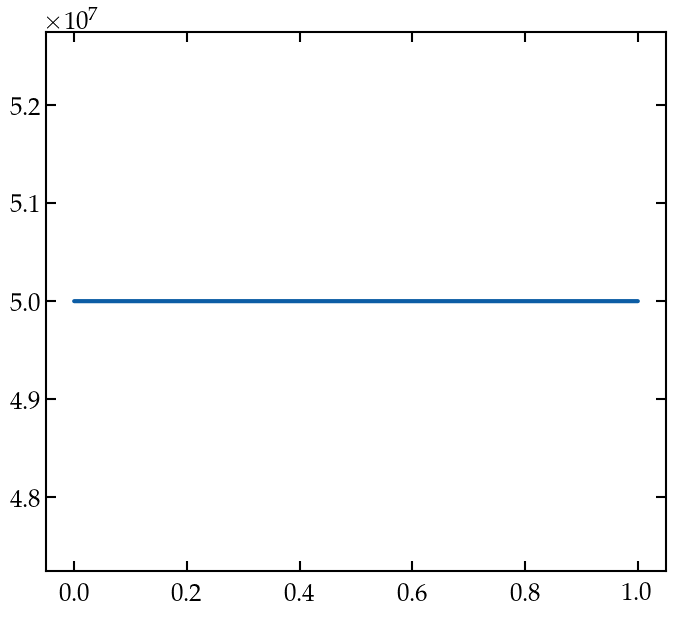

In [24]:
plt.plot(t_exp, -jz_model)

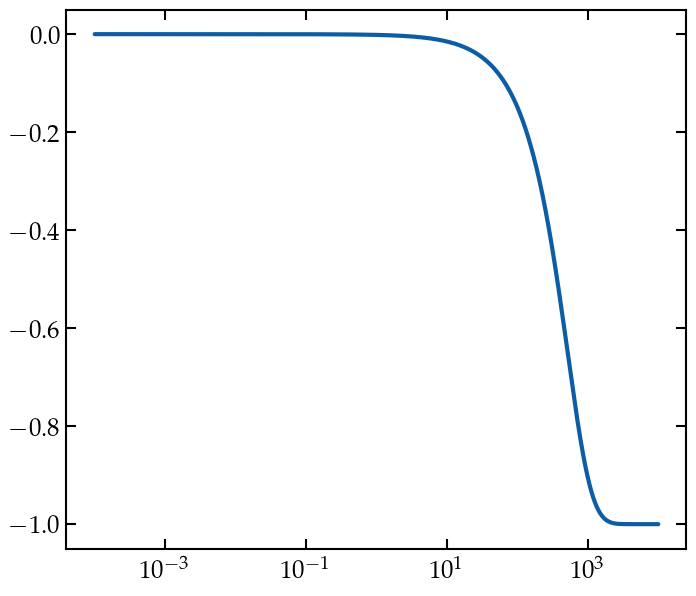

In [96]:
# plt.semilogx(t, np.abs(jz)/N*2-1)
#plt.plot(t_exp[::sk], Jz_mean_exp[::sk])


In [52]:
Jz_mean_exp

array([-519.23258697,  111.52293525,  324.4812655 , ...,   87.13924401,
       -262.62892485, -604.10106972])

In [53]:
Ncode

100000000